In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
if_df = pd.read_csv('insurance_claims.csv')
if_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [2]:
def infer_sql_types(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'
table_name = 'insurance_claims.csv'
columns = if_df.dtypes
sql_columns = ',\n '.join([f'"{col}"{infer_sql_types(dtype)}' for col, dtype in columns.items()])

create_stmt = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
 {sql_columns}
);
"""

print(create_stmt)


CREATE TABLE IF NOT EXISTS insurance_claims.csv (
 "months_as_customer"INT,
 "age"INT,
 "policy_number"INT,
 "policy_bind_date"TEXT,
 "policy_state"TEXT,
 "policy_csl"TEXT,
 "policy_deductable"INT,
 "policy_annual_premium"FLOAT,
 "umbrella_limit"INT,
 "insured_zip"INT,
 "insured_sex"TEXT,
 "insured_education_level"TEXT,
 "insured_occupation"TEXT,
 "insured_hobbies"TEXT,
 "insured_relationship"TEXT,
 "capital-gains"INT,
 "capital-loss"INT,
 "incident_date"TEXT,
 "incident_type"TEXT,
 "collision_type"TEXT,
 "incident_severity"TEXT,
 "authorities_contacted"TEXT,
 "incident_state"TEXT,
 "incident_city"TEXT,
 "incident_location"TEXT,
 "incident_hour_of_the_day"INT,
 "number_of_vehicles_involved"INT,
 "property_damage"TEXT,
 "bodily_injuries"INT,
 "witnesses"INT,
 "police_report_available"TEXT,
 "total_claim_amount"INT,
 "injury_claim"INT,
 "property_claim"INT,
 "vehicle_claim"INT,
 "auto_make"TEXT,
 "auto_model"TEXT,
 "auto_year"INT,
 "fraud_reported"TEXT
);



In [3]:
import psycopg2
conn = psycopg2.connect(
    dbname = "postgres",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

cur = conn.cursor()
# Create table manually here or auto-generate
cur.execute(create_stmt)
conn.commit()

# Auto-generate INSERT statement
columns = list(if_df.columns)
placeholders = ', '.join(['%s'] * len(columns))
insert_stmt = f"""INSERT INTO {table_name} ({', '.join(['"{}"'.format(col) for col in columns])}) 
VALUES ({placeholders})
"""

# Insert data row by row
for _, row in if_df.iterrows():
    cur.execute(insert_stmt, tuple(row))


conn.commit()
cur.close()
conn.close()


InvalidSchemaName: schema "insurance_claims" does not exist
LINE 2: CREATE TABLE IF NOT EXISTS insurance_claims.csv (
                                   ^


In [4]:
if_df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [5]:
if_df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [6]:
if_df['authorities_contacted'].value_counts().mean()

227.25

In [7]:
if_df.fillna('Fire',inplace=True)
if_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
if_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
#if_df[['policy_annual_premium','months_as_customer','age','capital-gains','capital-loss','old vs young']]
policy_info_df = pd.DataFrame ({'policy_number':if_df['policy_number'],
                                'policy_annual_premium':if_df['policy_annual_premium'],
                                'months_as_customer':if_df['months_as_customer'],
                                'age':if_df['age'],
                                'capital-gains':if_df['capital-gains'],
                                'capital-loss':if_df['capital-loss'],
                                'old vs young':if_df['old vs young']})
policy_info_df

,policy_number,policy_annual_premium,months_as_customer,age,capital-gains,capital-loss,old vs young
0,521585,1406.91,328,48,53300,0,old_age
1,342868,1197.22,228,42,0,0,old_age
2,687698,1413.14,134,29,35100,0,young_age
3,227811,1415.74,256,41,48900,-62400,old_age
4,367455,1583.91,228,44,66000,-46000,old_age
...,...,...,...,...,...,...,...
995,941851,1310.80,3,38,0,0,young_age
996,186934,1436.79,285,41,70900,0,old_age
997,918516,1383.49,130,34,35100,0,young_age
998,533940,1356.92,458,62,0,0,old_age


In [12]:
policy_info_df['total_policy_amount'] = policy_info_df['months_as_customer']/12 * policy_info_df['policy_annual_premium']
policy_info_df

,policy_number,policy_annual_premium,months_as_customer,age,capital-gains,capital-loss,old vs young,total_policy_amount
0,521585,1406.91,328,48,53300,0,old_age,38455.540000
1,342868,1197.22,228,42,0,0,old_age,22747.180000
2,687698,1413.14,134,29,35100,0,young_age,15780.063333
3,227811,1415.74,256,41,48900,-62400,old_age,30202.453333
4,367455,1583.91,228,44,66000,-46000,old_age,30094.290000
...,...,...,...,...,...,...,...,...
995,941851,1310.80,3,38,0,0,young_age,327.700000
996,186934,1436.79,285,41,70900,0,old_age,34123.762500
997,918516,1383.49,130,34,35100,0,young_age,14987.808333
998,533940,1356.92,458,62,0,0,old_age,51789.113333


In [13]:
if_df['incident_city'].value_counts()

incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64

In [10]:
def age_parameter(age):
    if age>40:
        return 'old_age'
    else:
        return 'young_age'
if_df['old vs young'] = if_df['age'].apply(age_parameter)
if_df['old vs young']

0        old_age
1        old_age
2      young_age
3        old_age
4        old_age
         ...    
995    young_age
996      old_age
997    young_age
998      old_age
999      old_age
Name: old vs young, Length: 1000, dtype: object

In [ ]:
if_df['old vs young'].value_counts()

In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(if_df['incident_type'],if_df['fraud_reported'])
contingency_table

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


In [17]:
import numpy as np

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import numpy as np

class InsuranceAnalysis:
    def __init__(self, if_df, policy_info_df):
        self.if_df = if_df
        self.policy_info_df = policy_info_df

    def fraud_count(self):
        return self.if_df['fraud_reported'].value_counts().reset_index()

    def mercedes_claim_amount(self):
        return self.if_df[self.if_df['auto_make'] == 'Mercedes']['total_claim_amount'].sum()

    def male_female_fraud(self):
        return self.if_df[self.if_df['fraud_reported'] == 'Y'].groupby('insured_sex').size().reset_index(name='count')

    def top_incident_type(self):
        return self.if_df['incident_type'].value_counts().head(2).reset_index()

    def bar_graph(self):
        top_cities = self.if_df['incident_city'].value_counts()
        plt.figure(figsize=(10, 5))
        return sns.barplot(x=top_cities.index, y=top_cities.values)

    def old_young_count(self):
        return self.if_df['old vs young'].value_counts().reset_index()

    def top_policy(self):
        return self.policy_info_df.sort_values(by='total_policy_amount', ascending=False)[['policy_number', 'total_policy_amount']].head(1)

    def cat_correlation(self):
        contingency_table = pd.crosstab(self.if_df['incident_type'], self.if_df['fraud_reported'])
        return chi2_contingency(contingency_table)[1]

    def concat_correlation(self):
        yes_list = self.if_df[self.if_df['fraud_reported'] == 'Y']['policy_annual_premium']
        no_list = self.if_df[self.if_df['fraud_reported'] == 'N']['policy_annual_premium']
        return f_oneway(yes_list, no_list)[1]

    def concon_correlation(self):
        corr_matrix = np.corrcoef(self.if_df['injury_claim'], self.if_df['policy_annual_premium'])
        return corr_matrix[0][1]

    def histogram_plot(self,col):
        sns.histplot(data=policy_info_df,x=col,bins= 20, color = 'skyblue')
        return plt.show()

    def scatterplot(self):
        sns.scatterplot(data =if_df ,x="months_as_customer",y= "umbrella_limit")

fraund_counts:
  fraud_reported  count
0              N    753
1              Y    247
Mercedes_claims:
3404190
insured_sex_fraud:
  insured_sex  count
0      FEMALE    126
1        MALE    121
top_accidents:
              incident_type  count
0   Multi-vehicle Collision    419
1  Single Vehicle Collision    403
top_cities_accidents:
Axes(0.125,0.11;0.775x0.77)
old & young count:
  old vs young  count
0    young_age    593
1      old_age    407
high paid policy number:
     policy_number  total_policy_amount
796         728025         67916.070833
cat_correlation:
2.1013336774786627e-06
concat_correlation:
0.6474289700890913
concon_correlation:
-0.017632685994798454
histogram:


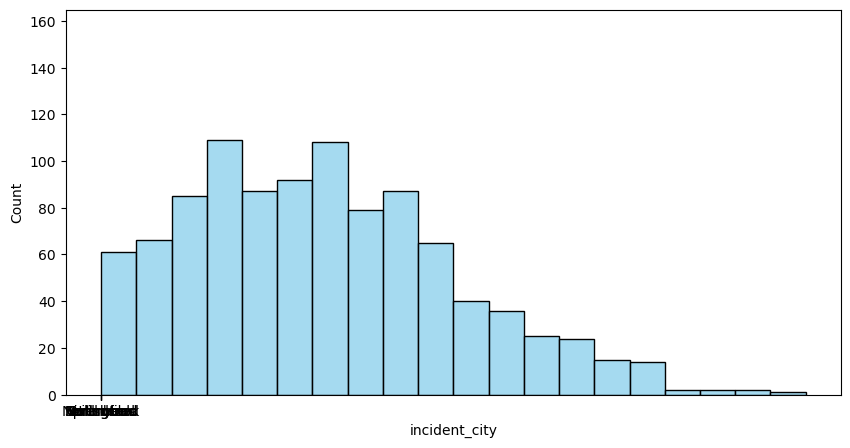

None
scatterplot:
None


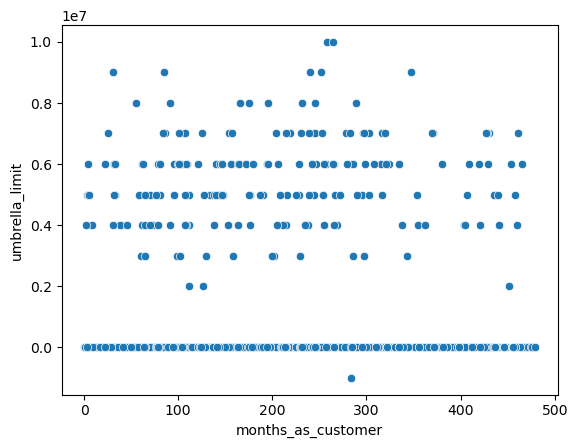

In [37]:
obj_balu = InsuranceAnalysis(if_df, policy_info_df)
print('fraund_counts:')
print(obj_balu.fraud_count())

print('Mercedes_claims:')
print(obj_balu.mercedes_claim_amount())

print('insured_sex_fraud:')
print(obj_balu.male_female_fraud())

print('top_accidents:')
print(obj_balu.top_incident_type())

print('top_cities_accidents:')
print(obj_balu.bar_graph())

print('old & young count:')
print(obj_balu.old_young_count())

print('high paid policy number:')
print(obj_balu.top_policy())

print('cat_correlation:')
print(obj_balu.cat_correlation())

print('concat_correlation:')
print(obj_balu.concat_correlation())

print('concon_correlation:')
print(obj_balu.concon_correlation())

print('histogram:')
print(obj_balu.histogram_plot("total_policy_amount"))

print('scatterplot:')
print(obj_balu.scatterplot())

top_cities_accidents:
Axes(0.125,0.11;0.775x0.77)


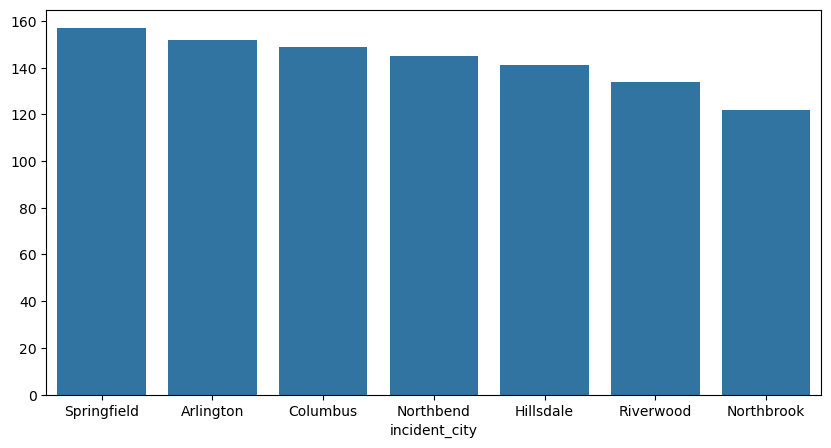

In [28]:
print('top_cities_accidents:')
print(obj_balu.bar_graph())